<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Без-масштабирования" data-toc-modified-id="Без-масштабирования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Без масштабирования</a></span></li><li><span><a href="#C-использованием-масштабирования" data-toc-modified-id="C-использованием-масштабирования-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>C использованием масштабирования</a></span></li></ul></li><li><span><a href="#Деревья-и-переобучение" data-toc-modified-id="Деревья-и-переобучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Деревья и переобучение</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Переобучение" data-toc-modified-id="Переобучение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Переобучение</a></span></li></ul></li><li><span><a href="#Кроссвалидация" data-toc-modified-id="Кроссвалидация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кроссвалидация</a></span></li><li><span><a href="#Поиск-гиперпараметров-по-сетке-(GridSearch)" data-toc-modified-id="Поиск-гиперпараметров-по-сетке-(GridSearch)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Поиск гиперпараметров по сетке (GridSearch)</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams, rcParamsDefault


In [16]:
def show_coef(names, coef, positive=False):
    if positive:
        sns.barplot(y=names, x=abs(coef), orient='h')
    else:
        sns.barplot(y=names, x=coef, orient='h')
    plt.tight_layout
    plt.show()
    

In [ ]:
rcParams['figure.figsize'] = 12,12
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
factor = 10
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi*factor

# Линейная регрессия

In [2]:
df = sns.load_dataset('mpg')
df = df.dropna()
df = df.drop(columns=['origin', 'name'])

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [7]:
x = df.drop('mpg', axis=1)
columns_name = x.columns.tolist()          
y = df['mpg']

<AxesSubplot:>

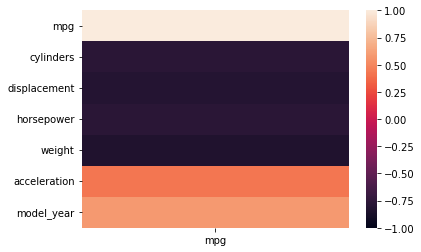

In [8]:
sns.heatmap(df.corr()[['mpg']], vmax=1, vmin=-1)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

## Без масштабирования

In [10]:
model = LinearRegression()

In [11]:
model.fit(train_x, train_y)

LinearRegression()

In [12]:
preds = model.predict(test_x)

In [13]:
mean_absolute_error(test_y, preds)

2.5038600897761265

In [14]:
model.coef_

array([-0.116173  ,  0.00101347, -0.00227634, -0.00656101,  0.06173551,
        0.76063644])

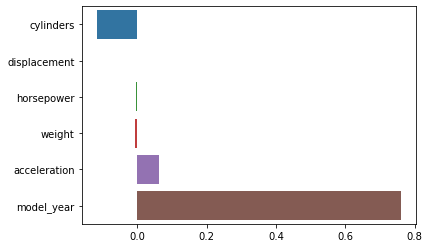

In [17]:
show_coef(columns_name, model.coef_)

## C использованием масштабирования

In [18]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [19]:
model.fit(train_x_scaled, train_y)
preds = model.predict(test_x_scaled)
mean_absolute_error(test_y, preds)

2.5038600897761247

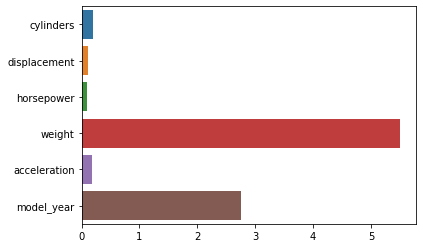

In [22]:
show_coef(columns_name, model.coef_, positive=True)

# Деревья и переобучение

In [23]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.datasets import make_classification, make_regression

data = load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [24]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=10, random_state=42)

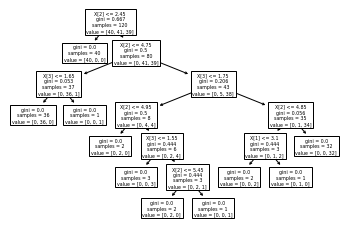

In [30]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.show()

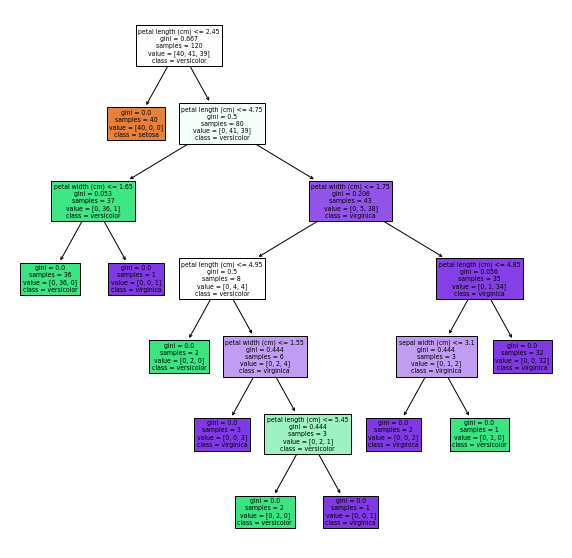

In [31]:
fn = [
    'sepal length (cm)', 
    'sepal width (cm)', 
    'petal length (cm)',
    'petal width (cm)'
]

cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

## Важность признаков

In [32]:
model.feature_importances_

array([0.        , 0.01667014, 0.90614339, 0.07718647])

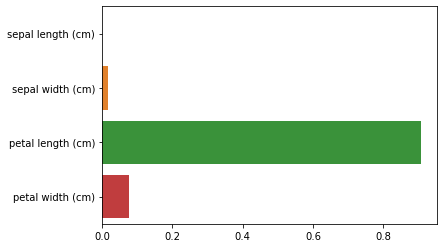

In [33]:
show_coef(data.feature_names, model.feature_importances_)

## Переобучение

In [34]:
# df = sns.load_dataset('mpg')
# df = df.dropna()
# df = df.drop(columns=['origin', 'name'])

x, y = make_classification(n_samples=5000,
                           n_features=50,
                           n_classes=5,
                           n_clusters_per_class=4,
                           n_informative=5,
                           random_state=42)

train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [36]:
test_scores = []
train_scores = []

best_max_depth = 1
best_score = 0

for n in range(1, 20):
    model = DecisionTreeClassifier(max_depth=n, random_state=42)
    model.fit(train_x, train_y)
    test_preds = model.predict(test_x)
    train_preds = model.predict(train_x)

    train_scores.append(accuracy_score(train_y, train_preds))
    test_scores.append(accuracy_score(test_y, test_preds))
    
    if accuracy_score(test_y, test_preds) > best_score:
        best_score = accuracy_score(test_y, test_preds)
        best_max_depth = n
        
print(f'Лучшая глубина дерева: {best_max_depth}')
print(f'Лучшая метрика: {best_score}')


Лучшая глубина дерева: 7
Лучшая метрика: 0.503


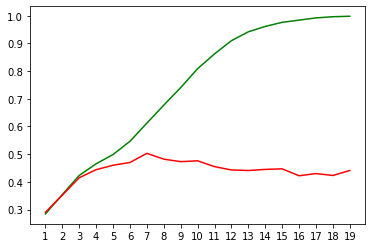

In [37]:
sns.lineplot(x=list(range(1, 20)), y=train_scores, color='g')
sns.lineplot(x=list(range(1, 20)), y=test_scores, color='r')
plt.xticks(list(range(1, 20)))
plt.show()


# Кроссвалидация

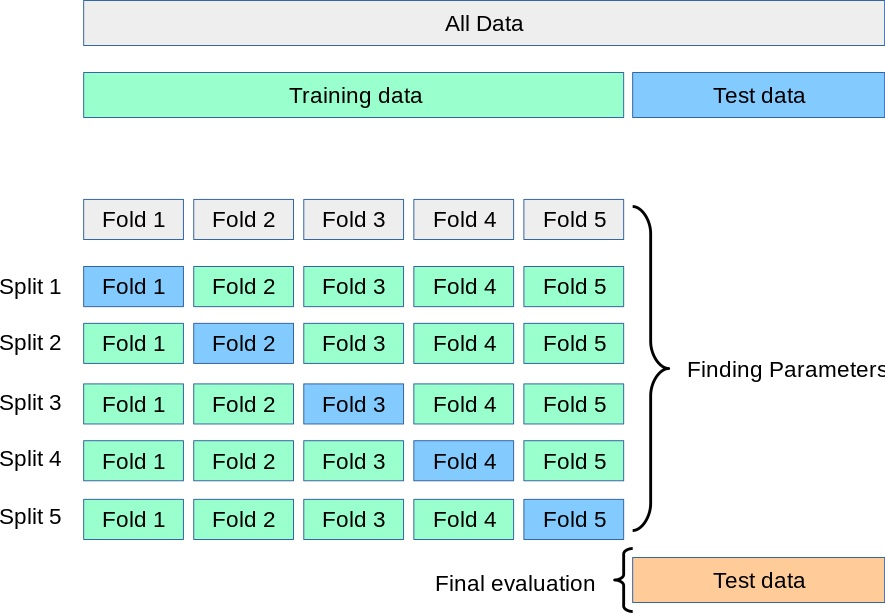

In [38]:
from sklearn.model_selection import StratifiedKFold, KFold

folds = KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in folds.split(x):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)

TRAIN: (4000,) TEST: (1000,)
TRAIN: (4000,) TEST: (1000,)
TRAIN: (4000,) TEST: (1000,)
TRAIN: (4000,) TEST: (1000,)
TRAIN: (4000,) TEST: (1000,)


# Поиск гиперпараметров по сетке (GridSearch)

In [44]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

params = {'max_depth':range(1,20)}

grid_model = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)

In [46]:
%%time

grid_model.fit(train_x, train_y)

CPU times: user 258 ms, sys: 23.5 ms, total: 281 ms
Wall time: 1.88 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, scoring='accuracy')

In [41]:
grid_model.best_score_

0.46950000000000003

In [42]:
grid_model.best_params_

{'max_depth': 7}

In [43]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=42)

In [47]:
preds = grid_model.predict(test_x)
accuracy_score(test_y, preds)

0.503

In [48]:
preds = grid_model.best_estimator_.predict(test_x)
accuracy_score(test_y, preds)

0.503

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [53]:
%%time

params = {'max_depth':range(1,10), 'n_estimators':[10, 100]}

grid_model = GridSearchCV(model, params, cv=3, scoring='accuracy', verbose=1)

grid_model.fit(train_x, train_y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 25.8 s, sys: 257 ms, total: 26.1 s
Wall time: 26.2 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 10), 'n_estimators': [10, 100]},
             scoring='accuracy', verbose=1)

In [54]:
grid_model.best_score_

0.5034971261556018

In [55]:
grid_model.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [56]:
preds = grid_model.predict(test_x)
accuracy_score(test_y, preds)

0.527

[CV 3/3; 3/18] START max_depth=2, n_estimators=10...............................
[CV 3/3; 3/18] END max_depth=2, n_estimators=10;, score=0.374 total time=   0.1s
[CV 2/3; 6/18] START max_depth=3, n_estimators=100..............................
[CV 2/3; 6/18] END max_depth=3, n_estimators=100;, score=0.417 total time=   1.0s
[CV 1/3; 15/18] START max_depth=8, n_estimators=10..............................
[CV 1/3; 15/18] END max_depth=8, n_estimators=10;, score=0.456 total time=   0.2s
[CV 2/3; 15/18] START max_depth=8, n_estimators=10..............................
[CV 2/3; 15/18] END max_depth=8, n_estimators=10;, score=0.452 total time=   0.2s
[CV 3/3; 17/18] START max_depth=9, n_estimators=10..............................
[CV 3/3; 17/18] END max_depth=9, n_estimators=10;, score=0.447 total time=   0.2s
[CV 2/3; 2/18] START max_depth=1, n_estimators=100..............................
[CV 2/3; 2/18] END max_depth=1, n_estimators=100;, score=0.331 total time=   0.6s
[CV 3/3; 9/18] START ma